<a href="https://colab.research.google.com/github/laitifranz/image-processing-engine/blob/main/ETI_task1_Avesani_Laiti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1**
---

Team *Stentinel*

**Avesani Manuel | Laiti Francesco**

Elaborazione e trasmissione delle immagini
a.a. 2020/2021

---



# OBIETTIVO 

**DEFINIZIONE DELLA STRUTTURA DATI BASE**

Definizione e implementazione della sequenza di classi che permettono di gestire l’engine, i blocchi e la loro interconnessione.

---




# CODICE

---

## **PACKAGES e LIBRERIE**

- opencv-python
- scikit-image
- networkx
- matplotlib



In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import filters
import urllib.request
import networkx as nx
import cv2
import os

## **IMG_OBJ**

_Nota:_ Google Colab resitutisce un errore con _cv.imshow()_; usare _cv_imshow()_ con aggiunta della libreria _from google.colab.patches import cv2_imshow_

In [ ]:
class Img_obj:
  def __init__(self, source, path=''):
    self.path = path
    self.source = source

    if (source == 'camera'): #su GColab non funziona la cattura di images da webcam
      webcam = cv2.VideoCapture(0) 
      status, frame = webcam.read()
      if (status == False): 
        print("Error while taking webcam picture")
        exit()
      webcam.release()
      self.img = frame
      self.gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)

    elif (source == 'url'):
      split = self.path.split('/')
      name = str(split[-1])
      urllib.request.urlretrieve(self.path, name) 
      self.img = cv2.imread(name)
      self.gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)

    elif (source == 'local'):
      self.img = cv2.imread(path)
      self.gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)

    else:
      print(self.source + " is not a valid input source, please retry\n")
      exit()
  
  def get_info(self):
    print("Original: " + '\t' + str(self.img.shape) + '\n\t\t' )
    print("Gray scale: " + '\t' + str(self.gray.shape) + '\n\t\t' )
    cv2_imshow(self.gray)

  def set(self, mode, w0=0, w1=0, h0=0, h1=0):
    if mode == 'flip':
      self.gray = cv2.flip(self.gray,0)
    if mode == 'mirror':
      self.gray = cv2.flip(self.gray,1)
    if mode == 'crop':
      height, width = self.gray.shape
      if h1 < height or w1 < width:
        self.gray = self.gray[h0:h1, w0:w1]
      else:
        print("Unable to crop the image: your values overcome the height or width of the image.")
    cv2_imshow(self.gray)

  def get(self):
    return self.gray

#img1 = Img_obj('url','https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png')
#img1.set('crop',120,250,120,250)
#img1.mostra_img()
#img1.get_info()

## **FILTER**

In [ ]:
class Filter:
  def __init__(self, typology, sizeX=0, sizeY=0, kernel=0, norm=0):
    self.typology = typology
    self.sizeX = sizeX
    self.sizeY = sizeY
    self.kernel = kernel
    self.norm = norm

    if typology == 'median':
      print("Median filter created")
    elif typology == 'gaussian':
      print("Gaussian filter created")
    else:
      print(self.typology + " is not a valid input filter, please retry\n")
      exit()

  def run(self,image):
    if self.typology == 'median':
      f = filters.median(image)
    elif self.typology == 'gaussian':
      f = filters.gaussian(image)
    norm_image = cv2.normalize(f, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    #riga sopra necessaria per normalizzare valori e visualizzarli a display in una scala da 0 a 255
    self.image = norm_image

  def get(self):
    return self.image

#lpf = Filter('gaussian')
#lpf.run(img1.get())


## **EDGE_DETECT**

In [ ]:
class Edge_detect:
  def __init__(self, typology, threshold=0):
    self.typology = typology
    self.threshold = threshold
   
    if typology == 'sobel':
      print("Sobel filter created")
    elif typology == 'prewitt':
      print("Prewitt filter created")
    elif typology == 'roberts':
      print("Roberts filter created")
    else:
      print(self.typology + " is not a valid input filter, please retry\n")
      exit()

  def run(self,image):
    if self.typology == 'sobel':
      edge = filters.sobel(image)
    elif self.typology == 'prewitt':
      edge = filters.prewitt(image)
    elif self.typology == 'roberts':
      edge = filters.roberts(image)
    norm_image = cv2.normalize(edge, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    self.image = norm_image

  def get(self):
    return self.image

#img2 = Img_obj('url','https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png')
#lpf = Filter('gaussian')
#lpf.run(img2.get())
#edges1 = Edge_detect('roberts')
#edges1.run(img2.get())
#edges2 = Edge_detect('prewitt')
#edges2.run(img2.get())

## **OUTPUT**

In [ ]:
class Output:
  def __init__(self, file_name):
    self.file_name = file_name
    newpath = os.getcwd() + '/Output' 
    if not os.path.exists(newpath):
      os.makedirs(newpath)

  def save(self,image):
    currentDirectory = os.getcwd()
    status = cv2.imwrite(currentDirectory + '/Output/' + self.file_name, image)

    if (status == True):
      print("OUTPUT | Image successfully saved in " + currentDirectory)
    else:
      print("OUTPUT | Error while saving the image")

  def get_name(self):
    return self.file_name

  def run(self,image):
    self.save(image)

#output1 = Output('final_result.png')
#img1 = Img_obj('url','https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png')
#output2 = Output('gg_result.png')
#output1.save(img1.get())
#cv2_imshow(img1.get())

## **TAP**

In [ ]:
class Tap:
  def __init__(self, mode):
    self.count = 0
    if mode != 'show' and mode != 'save':
      print(self.mode + " is not a valid mode, please retry\n")
      exit()
    else:
      self.mode = mode

    newpath = os.getcwd() + '/Tap' 
    if not os.path.exists(newpath):
      os.makedirs(newpath)

  def set_name(self,name):
    self.name_block =  str(name + '_n' + str(self.count))
    self.count = self.count + 1

  def save(self,image):
    currentDirectory = os.getcwd()
    status = cv2.imwrite(currentDirectory + '/Tap/' + self.name_block + '.png', image)

    if (status == True):
      print("TAP | Image successfully saved in " + currentDirectory)
    else:
      print("TAP | Error while saving the image")

  def show(self,image):
    cv2_imshow(image)

  def run(self, image):
    if self.mode == 'show':
      self.show(image)
    elif self.mode == 'save':
      self.save(image)

#tap1 = Tap('show')
#tap1 = Tap('lpf_block','show')
#tap1.set_name('test')
#tap1.save(img1.get())

## **IMG_ENGINE**

In [ ]:
class Img_engine:
  def __init__(self, nome):
    self.G = nx.DiGraph(name = nome) #grafo direzionale (con frecce)
    self.nome = nome
  def attach(self, block):
    self.G.add_node(block)

  def connect(self,input,output):
    #controllo che non ci siano output/input disposti in ordine sbagliato
    if type(input).__name__ == 'Tap':
      print(type(input).__name__ + " is not a valid INPUT block, it is only an OUTPUT block")
      exit()
    if type(input).__name__ == 'Output':
      print(type(input).__name__ + " is not a valid INPUT block, it is only an OUTPUT block")
      exit()
    if type(output).__name__ == 'Img_obj':
      print(type(input).__name__ + " is not a valid OUTPUT block, it is only an INPUT block")
      exit()
    #se esiste un TAP passo il valore per dare nome a file da salvare in tap quando verrà richiamato
    if type(output).__name__ == 'Tap':
      output.set_name(str(type(input).__name__))

    self.G.add_edge(input,output)

  def run(self):
    D = nx.to_dict_of_lists(self.G) #https://networkx.org/documentation/stable/reference/convert.html
    #KEY: sono i blocchi
    for key,values in D.items():
    #print(D.keys())
      #print("Chiave:\t" + type(key).__name__)

      if type(key).__name__ != 'Output' and type(key).__name__ != 'Tap': #viene considerato OUTPUT un nodo giustamente, ma non ha funzione get()
        file = key.get() #ottengo immagine modificata da blocco precedente

      for element in values:
        #print("Chiave:\t" + type(key).__name__ + " || Elemento:\t" + type(element).__name__)
        element.run(file) #non serve salvare il file perché viene salvato dalla classe richiamata
    print('\n################')
    print('## Run ended! ##')
    print('################\n')
  
  def info(self):
    print(nx.info(self.G))
    print(self.G.nodes)
    #https://stackoverflow.com/questions/48543460/how-to-use-user-defined-class-object-as-a-networkx-node

  def show(self):
    plt.figure(figsize=(10,10))
    plt.title('Grafo di ' + self.nome)
    nx.draw_spring(self.G, with_labels = True, node_color='skyblue', node_size=500, edgecolors='red')
    #https://towardsdatascience.com/customizing-networkx-graphs-f80b4e69bedf | pagina web per personalizzare il grafico

## **MAIN 1 di 2**

Catena di elaborazione presente sul pdf "TM-ETI Progettini 20-21.pdf"


Median filter created
Sobel filter created
Sobel filter created
Name: catenaDiElab
Type: DiGraph
Number of nodes: 6
Number of edges: 5
Average in degree:   0.8333
Average out degree:   0.8333
[<__main__.Img_obj object at 0x7efc61c4b350>, <__main__.Filter object at 0x7efc650eb3d0>, <__main__.Edge_detect object at 0x7efc626d6490>, <__main__.Edge_detect object at 0x7efc61ca1f10>, <__main__.Output object at 0x7efc61ca1990>, <__main__.Output object at 0x7efc650e3510>]
OUTPUT | Image successfully saved in /content
OUTPUT | Image successfully saved in /content

################
## Run ended! ##
################



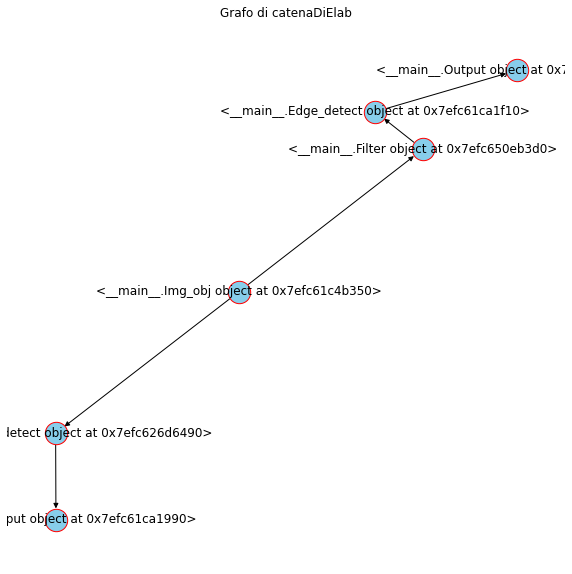

In [ ]:
#catena di elaborazione presente sul pdf "TM-ETI Progettini 20-21.pdf"

engine1 = Img_engine('catenaDiElab')
img1 = Img_obj('url','https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png')
lpf = Filter('median')
edges1 = Edge_detect('sobel')
edges2 = Edge_detect('sobel')
output1 = Output('edge_senza_LPF.png')
output2 = Output('edge_con_LPF.png')

engine1.attach(img1)
engine1.attach(lpf)
engine1.attach(edges1)
engine1.attach(edges2)
engine1.attach(output1)
engine1.attach(output2)

engine1.connect(img1,edges1)
engine1.connect(img1,lpf)
engine1.connect(lpf,edges2)
engine1.connect(edges1,output1)
engine1.connect(edges2,output2)

engine1.info()
engine1.show()
engine1.run()

del engine1, img1, lpf, edges1, edges2, output1, output2
#buona norma deallocare tutto quello che si è creato

## **MAIN 2 di 2**

Catena di elaborazione con aggiunta dell'oggetto Tap

Median filter created
Sobel filter created
Sobel filter created
Name: engineConTap
Type: DiGraph
Number of nodes: 7
Number of edges: 6
Average in degree:   0.8571
Average out degree:   0.8571
[<__main__.Img_obj object at 0x7efc58f1ac90>, <__main__.Filter object at 0x7efc58f03550>, <__main__.Tap object at 0x7efc58f03890>, <__main__.Edge_detect object at 0x7efc61c4bbd0>, <__main__.Edge_detect object at 0x7efc61c356d0>, <__main__.Output object at 0x7efc58f03810>, <__main__.Output object at 0x7efc58f03a10>]
TAP | Image successfully saved in /content
OUTPUT | Image successfully saved in /content
OUTPUT | Image successfully saved in /content

################
## Run ended! ##
################



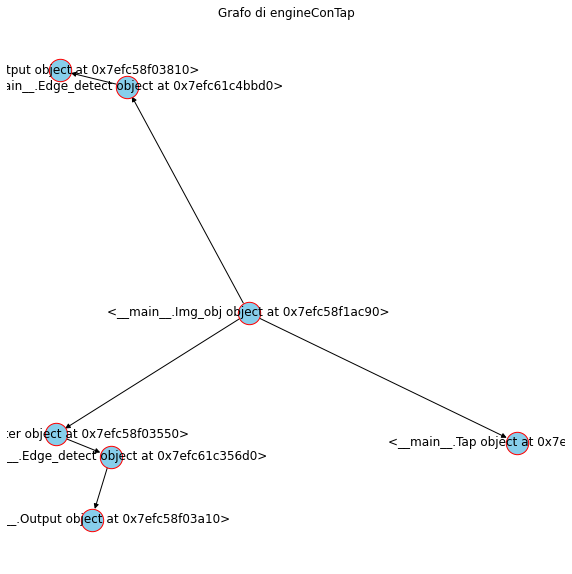

In [ ]:
#catena di elaborazione con aggiunta dell'oggetto Tap
#estrapolo e mostro l'immagine pre e post filtro gaussiano

engine2 = Img_engine('engineConTap')
img2 = Img_obj('url','https://articles-images.sftcdn.net/wp-content/uploads/sites/4/2014/04/windows_xp_bliss-wide1.jpg')
lpf2 = Filter('median')
edges1 = Edge_detect('sobel')
edges2 = Edge_detect('sobel')
tap3 = Tap('save')
output1 = Output('xp_senzaFiltro.jpg')
output2 = Output('xp_conFiltro.jpg')

engine2.attach(img2)
engine2.attach(lpf2)
engine2.attach(tap3)
engine2.attach(edges1)
engine2.attach(edges2)
engine2.attach(output1)
engine2.attach(output2)

engine2.connect(img2,edges1)
engine2.connect(img2,tap3)
engine2.connect(img2,lpf2)
engine2.connect(lpf2,edges2)
engine2.connect(edges1,output1)
engine2.connect(edges2,output2)

engine2.info()
engine2.show()
engine2.run()

del engine2, img2, lpf2, edges1, edges2, tap3, output1, output2